In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('kazakh.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.638546,0.569425,-5.775929e-07,0.561753,0.548447,-0.022888,0.497520,0.484177,-0.036764,0.488489,...,0.683386,0.276310,-0.053814,0.676067,0.332233,-0.041367,0.671082,0.380290,-0.024348,a
1,0.639556,0.577114,-6.157682e-07,0.563342,0.549923,-0.024295,0.499969,0.481771,-0.039310,0.495341,...,0.683764,0.277157,-0.057226,0.674979,0.335536,-0.044597,0.669871,0.385857,-0.026909,a
2,0.639785,0.579869,-6.218052e-07,0.567555,0.549665,-0.024326,0.509730,0.476245,-0.037523,0.517246,...,0.680777,0.284432,-0.045457,0.674521,0.345986,-0.031884,0.675055,0.389474,-0.012824,a
3,0.644682,0.585111,-6.663796e-07,0.571171,0.549076,-0.021243,0.510621,0.478187,-0.033067,0.519690,...,0.682805,0.302961,-0.047580,0.676953,0.366691,-0.033049,0.679634,0.406295,-0.014331,a
4,0.654230,0.586152,-6.211545e-07,0.577386,0.556978,-0.023523,0.510987,0.485398,-0.036197,0.523537,...,0.684377,0.323568,-0.054745,0.682082,0.389025,-0.040187,0.686548,0.418655,-0.022154,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.658532,0.698438,-2.011514e-07,0.587009,0.685310,-0.005256,0.536641,0.613139,-0.007728,0.512496,...,0.673069,0.330620,-0.029527,0.639235,0.297635,-0.037155,0.606411,0.298705,-0.040175,a`
195,0.659727,0.702612,-2.441560e-07,0.589834,0.689287,-0.006428,0.537611,0.617430,-0.009866,0.511740,...,0.673882,0.330687,-0.031254,0.638352,0.296609,-0.038143,0.603960,0.296524,-0.040337,a`
196,0.661679,0.703835,-2.545134e-07,0.588779,0.688269,-0.005163,0.535666,0.614087,-0.007012,0.511170,...,0.677708,0.329930,-0.028443,0.642013,0.295945,-0.036667,0.607346,0.297328,-0.040004,a`
197,0.664620,0.707440,-2.751649e-07,0.590195,0.689824,-0.003053,0.535477,0.615643,-0.003185,0.510162,...,0.679464,0.329390,-0.025658,0.643730,0.294921,-0.034671,0.609177,0.295952,-0.038577,a`


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.638546,0.569425,-5.775929e-07,0.561753,0.548447,-0.022888,0.497520,0.484177,-0.036764,0.488489,...,0.683386,0.276310,-0.053814,0.676067,0.332233,-0.041367,0.671082,0.380290,-0.024348,a
1,0.639556,0.577114,-6.157682e-07,0.563342,0.549923,-0.024295,0.499969,0.481771,-0.039310,0.495341,...,0.683764,0.277157,-0.057226,0.674979,0.335536,-0.044597,0.669871,0.385857,-0.026909,a
2,0.639785,0.579869,-6.218052e-07,0.567555,0.549665,-0.024326,0.509730,0.476245,-0.037523,0.517246,...,0.680777,0.284432,-0.045457,0.674521,0.345986,-0.031884,0.675055,0.389474,-0.012824,a
3,0.644682,0.585111,-6.663796e-07,0.571171,0.549076,-0.021243,0.510621,0.478187,-0.033067,0.519690,...,0.682805,0.302961,-0.047580,0.676953,0.366691,-0.033049,0.679634,0.406295,-0.014331,a
4,0.654230,0.586152,-6.211545e-07,0.577386,0.556978,-0.023523,0.510987,0.485398,-0.036197,0.523537,...,0.684377,0.323568,-0.054745,0.682082,0.389025,-0.040187,0.686548,0.418655,-0.022154,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.658532,0.698438,-2.011514e-07,0.587009,0.685310,-0.005256,0.536641,0.613139,-0.007728,0.512496,...,0.673069,0.330620,-0.029527,0.639235,0.297635,-0.037155,0.606411,0.298705,-0.040175,a`
195,0.659727,0.702612,-2.441560e-07,0.589834,0.689287,-0.006428,0.537611,0.617430,-0.009866,0.511740,...,0.673882,0.330687,-0.031254,0.638352,0.296609,-0.038143,0.603960,0.296524,-0.040337,a`
196,0.661679,0.703835,-2.545134e-07,0.588779,0.688269,-0.005163,0.535666,0.614087,-0.007012,0.511170,...,0.677708,0.329930,-0.028443,0.642013,0.295945,-0.036667,0.607346,0.297328,-0.040004,a`
197,0.664620,0.707440,-2.751649e-07,0.590195,0.689824,-0.003053,0.535477,0.615643,-0.003185,0.510162,...,0.679464,0.329390,-0.025658,0.643730,0.294921,-0.034671,0.609177,0.295952,-0.038577,a`


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (199, 63)
Labels shape = (199,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['a', 'a`', 'a`', 'a', 'a`', 'a`', 'a', 'a`', 'a', 'a`', 'a', 'a`',
       'a`', 'a`', 'a', 'a', 'a', 'a`', 'a', 'a', 'a`', 'a`', 'a', 'a`',
       'a', 'a`', 'a`', 'a`', 'a', 'a', 'a', 'a', 'a', 'a`', 'a', 'a`',
       'a`', 'a', 'a`', 'a`'], dtype=object)

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(1.0, 1.0, 1.0)

In [8]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)
print("Training score =", svm.score(x_train, y_train))
y_pred = svm.predict(x_test)
print("Testing score =", accuracy_score(y_test, y_pred))

Training score = 1.0
Testing score = 1.0


<AxesSubplot:title={'center':'Confusion Matrix - Turkey Sign Language'}>

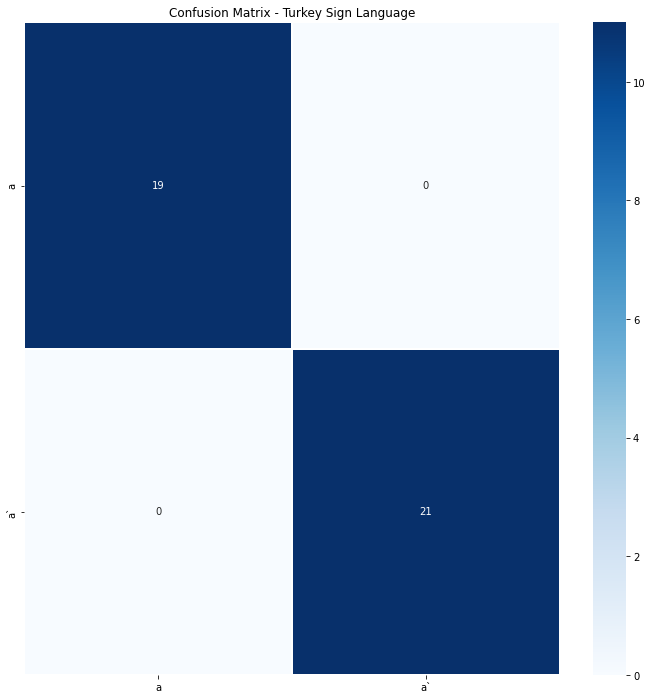

In [9]:
labels = sorted(list(set(df['Output'])))
labels = [x for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Turkey Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=11,
                     fmt='g',
                     ax=ax
                    )
maping

In [10]:
import pickle

# save model
with open('love.pkl','wb') as f:
    pickle.dump(svm,f)